# MNIST Handwritten Digit Classification with Custom Neural Network

A Neural Network is a computational graph structure which consists of layers of nodes called ’neurons’ which have biases and connecting weighted edges called ’synapses’. The concept of the neural network is biologically inspired by the function of a biological brain and replicates its learning capabilities.


> **According to ChatGPT:**
>
> A fully connected neural network, also known as a dense neural network, is a type of neural network in which each neuron in one layer is connected to every neuron in the next layer. This means that the output of each neuron in one layer is used as input for all neurons in the next layer. This allows for a large number of parameters to be learned and for complex non-linear relationships to be modeled. Fully connected neural networks are often used for tasks such as image classification, speech recognition, and natural language processing.

## 🏆 Goal
In this notebook we explore the implementation of a neural network. We will do this by building and training a neural network to classify images of handwritten digits from the MNIST dataset.

<center>
    <figure>
        <img src="https://i.postimg.cc/ZqsJckVV/ANN.gif" alt ="Artificial Neural Network" style='width: 600px;'>
        <figcaption>
            GIF Source: <a href="https://gfycat.com/bitesizedweeblacklemur">[Source]</a></figcaption>
    </figure>
</center>

## 📁 Dataset
The MNIST database is a large database consisting of 28x28 handwritten digit images that is commonly used for training various computer vision models. It contains 60,000 training images and 10,000 testing images. 

### For more information check out the following links:
> - [Original MNIST Database](http://yann.lecun.com/exdb/mnist/)
> - [Kaggle: MNIST Dataset](https://www.kaggle.com/datasets/oddrationale/mnist-in-csv)

### Note:
> - The development of this project is currently delayed as I am working on multiple projects at the same time.
> - This notebook is still in development! The next updates will cover the addition of educational resources and explanations of the content covered in this notebook.
> - This note will be removed once this notebook is considered to be complete. Thank you for taking the time to view this project.

In [1]:
# suppress warnings
import warnings
warnings.filterwarnings('ignore')

# import required modules
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.metrics import accuracy_score, confusion_matrix, matthews_corrcoef
from scikitplot.metrics import plot_roc

from NeuralNetwork import NeuralNetwork
from NetworkConfigHandler import NetworkConfigHandler
from PreProcessor import PreProcessor
from DataHandler import DataHandler
from ActivationFunctions import ActivationFunctions

# 1. Load Dataset

In [2]:
# Define paths to csv files
mnist_train = '../data/mnist_data/mnist_train.csv'
mnist_test = '../data/mnist_data/mnist_test.csv'

In [3]:
# Initialise feature and label columns
delimiter = ','
features = [f'pixel_{i}' for i in range(784)]
targets = ['id']
column_names = targets + features

In [4]:
# Load the csv files
train_df = PreProcessor.load_data(mnist_train, column_names=column_names)
test_df = PreProcessor.load_data(mnist_test, column_names=column_names)

Reading data from ../data/mnist_data/mnist_train.csv
Reading data from ../data/mnist_data/mnist_test.csv


In [5]:
# View the first 10 samples from the training set
train_df.head(10)

,id,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# View the first 10 samples from the test set
test_df

,id,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Create train-validation split

In [7]:
# use 40% of the training set for testing the framework 
# remove the line below to use the full training set 
train_df = train_df.sample(frac=.4)

# Create train-validation splits
train_df, val_df = PreProcessor.split_dataset(train_df, 0.2, seed=42)
train_df.shape, val_df.shape

((19200, 785), (4800, 785))

In [8]:
# Preprocess training data  
X_train = PreProcessor.normalize_dataset(train_df.loc[:, features].to_numpy())
y_train = train_df.loc[:, targets].to_numpy()

# Preprocess validation data 
X_val = PreProcessor.normalize_dataset(val_df.loc[:, features].to_numpy())
y_val = val_df.loc[:, targets].to_numpy()

# Preprocess test data 
X_test = PreProcessor.normalize_dataset(test_df.loc[:, features].to_numpy())
y_test = test_df.loc[:, targets].to_numpy()

### Encode targets

In [9]:
# Define one-hot encoder
encoder = OneHotEncoder(sparse=False)

# Fit encoder and transform training labels
y_train_one_hot = encoder.fit_transform(y_train.reshape(-1, 1))

# Transform validation and testing labels
y_val_one_hot = encoder.transform(y_val.reshape(-1, 1))
y_test_one_hot = encoder.transform(y_test.reshape(-1, 1))

In [10]:
# View training label sample
idx = random.randint(0, len(X_train))
print('Label:', y_train[idx])
print('One-hot Encoding:', y_train_one_hot[idx])
print('One-hot shape:', y_train_one_hot.shape)

Label: [4]
One-hot Encoding: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
One-hot shape: (19200, 10)


### View Sample Image

In [11]:
def plot_digit(digit, label=None):
    plt.imshow(digit.reshape(28, 28), cmap='gray')
    if label != None:
        plt.title(f'Digit: {label}')
    plt.show()

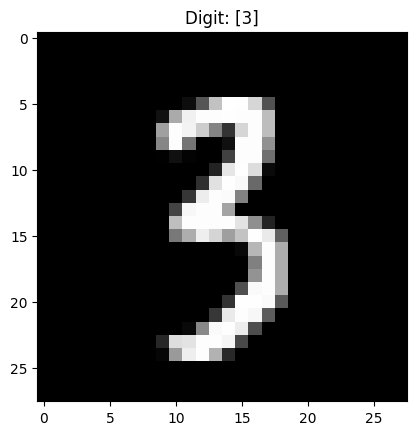

In [12]:
# Plot random training sample
idx = random.randint(0, len(X_train))
plot_digit(X_train[idx], y_train[idx])

# 2. Create Input Data Pipeline with DataHandler

In [13]:
# Create training input pipeline
train_ds = DataHandler(X_train, y_train_one_hot, shuffle=True)

# Create validation input pipeline
val_ds = DataHandler(X_val, y_val_one_hot)

# Create test input pipeline
test_ds = DataHandler(X_test, y_test_one_hot)

In [14]:
# View pipeline input & target shapes
print(train_ds.X.shape, train_ds.y.shape)
print(val_ds.X.shape, val_ds.y.shape)
print(test_ds.X.shape, test_ds.y.shape)

(19200, 784) (19200, 10)
(4800, 784) (4800, 10)
(10000, 784) (10000, 10)


# 3. Build Neural Network

In [15]:
# initialise neural network parameters
input_size = len(features) # size of input
alpha = 12 # learning rate
model_config = [
    {'units': input_size, 'activation': 'input'},
    {'units': 768, 'activation': 'relu'},
    {'units': 10, 'activation': 'sigmoid'}
]

In [16]:
# construct neural network
model = NeuralNetwork(model_config, alpha)

### Train Model

In [17]:
#train neural network
epochs = 5
model.fit(train_ds, val_ds, epochs)

Data received -> Training initiated...
Epoch 1/5


100%|██████████| 19200/19200 [01:21<00:00, 235.55it/s]


cost: 9.170107			accuracy: 0.821979
val_cost: 9.193402		val_accuracy: 0.885417
-------------------------------------------------
Epoch 2/5


100%|██████████| 19200/19200 [01:23<00:00, 230.68it/s]


cost: 9.084997			accuracy: 0.894896
val_cost: 8.952222		val_accuracy: 0.908333
-------------------------------------------------
Epoch 3/5


100%|██████████| 19200/19200 [01:22<00:00, 233.24it/s]


cost: 9.072491			accuracy: 0.912917
val_cost: 8.921659		val_accuracy: 0.912292
-------------------------------------------------
Epoch 4/5


100%|██████████| 19200/19200 [01:15<00:00, 255.22it/s]


cost: 9.060306			accuracy: 0.923906
val_cost: 9.073555		val_accuracy: 0.914167
-------------------------------------------------
Epoch 5/5


100%|██████████| 19200/19200 [01:09<00:00, 277.18it/s]


cost: 9.053625			accuracy: 0.929167
val_cost: 8.881315		val_accuracy: 0.919167
-------------------------------------------------


# 4. Inspect Model Performance

In [18]:
# Evaluate model on test set
cost, acc = model.evaluate(test_ds)
print('Test Cost:', cost)
print('Test Accuracy:', f'{round(acc * 100, 2)}%')

Test Cost: 8.898349634385879
Test Accuracy: 92.46%


In [19]:
# Generate test prediction probabilities
test_probabilities = model.predict(test_ds)
test_probabilities.shape

(10000, 10, 1)

In [20]:
# Generate test prediction labels
test_predictions = np.argmax(test_probabilities, axis=1)
test_predictions.shape

(10000, 1)

In [21]:
# View model cost history
print('Train_cost:',model.cost_hist['Train_cost'])
print('Validation_cost:',model.cost_hist['Validation_cost'])

Train_cost: [9.170106752659857, 9.084996924580086, 9.07249138860087, 9.06030588188941, 9.053625234321922]
Validation_cost: [9.193402478181552, 8.952221958701776, 8.921658606944602, 9.073555187666205, 8.881314509618708]


### Plot Model Training History

In [22]:
# combine model history into one record
model_history = {
    'accuracy':         model.accuracies['Train_set'],
    'val_accuracy':     model.accuracies['Validation_set'],
    'cost':             model.cost_hist['Train_cost'],
    'val_cost':     model.cost_hist['Validation_cost']
}
model_history

{'accuracy': [0.8219791666664266,
  0.8948958333330269,
  0.9129166666663439,
  0.9239062499996672,
  0.9291666666663291],
 'val_accuracy': [0.8854166666666666,
  0.9083333333333333,
  0.9122916666666666,
  0.9141666666666667,
  0.9191666666666667],
 'cost': [9.170106752659857,
  9.084996924580086,
  9.07249138860087,
  9.06030588188941,
  9.053625234321922],
 'val_cost': [9.193402478181552,
  8.952221958701776,
  8.921658606944602,
  9.073555187666205,
  8.881314509618708]}

In [23]:
def plot_training_curves(history):
    
    cost = np.array(history['cost'])
    val_cost = np.array(history['val_cost'])

    accuracy = np.array(history['accuracy'])
    val_accuracy = np.array(history['val_accuracy'])

    epochs = range(len(history['cost']))

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

    # Plot loss
    ax1.plot(epochs, cost, label='training_loss', marker='o')
    ax1.plot(epochs, val_cost, label='val_loss', marker='o')
    
    ax1.fill_between(epochs, cost, val_cost, where=(cost > val_cost), color='C0', alpha=0.3, interpolate=True)
    ax1.fill_between(epochs, cost, val_cost, where=(cost < val_cost), color='C1', alpha=0.3, interpolate=True)

    ax1.set_title('Cost (Lower Means Better)', fontsize=16)
    ax1.set_xlabel('Epochs', fontsize=12)
    ax1.legend()

    # Plot accuracy
    ax2.plot(epochs, accuracy, label='training_accuracy', marker='o')
    ax2.plot(epochs, val_accuracy, label='val_accuracy', marker='o')
    
    ax2.fill_between(epochs, accuracy, val_accuracy, where=(accuracy > val_accuracy), color='C0', alpha=0.3, interpolate=True)
    ax2.fill_between(epochs, accuracy, val_accuracy, where=(accuracy < val_accuracy), color='C1', alpha=0.3, interpolate=True)

    ax2.set_title('Accuracy (Higher Means Better)', fontsize=16)
    ax2.set_xlabel('Epochs', fontsize=12)
    ax2.legend();


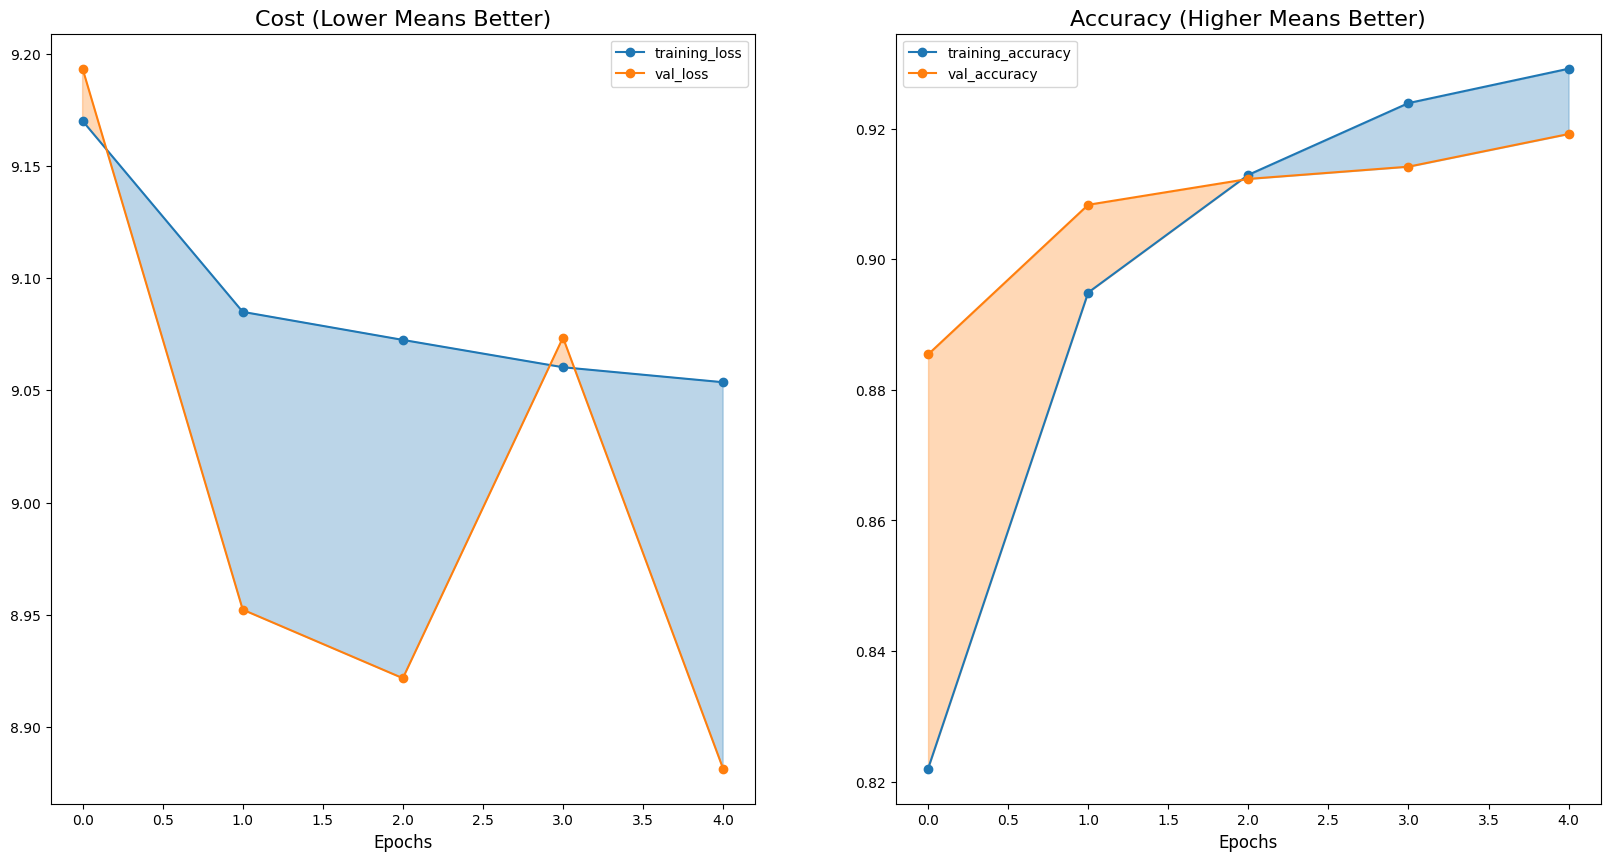

In [24]:
# Plot training history
plot_training_curves(model_history)

### Plot Model ROC Curves

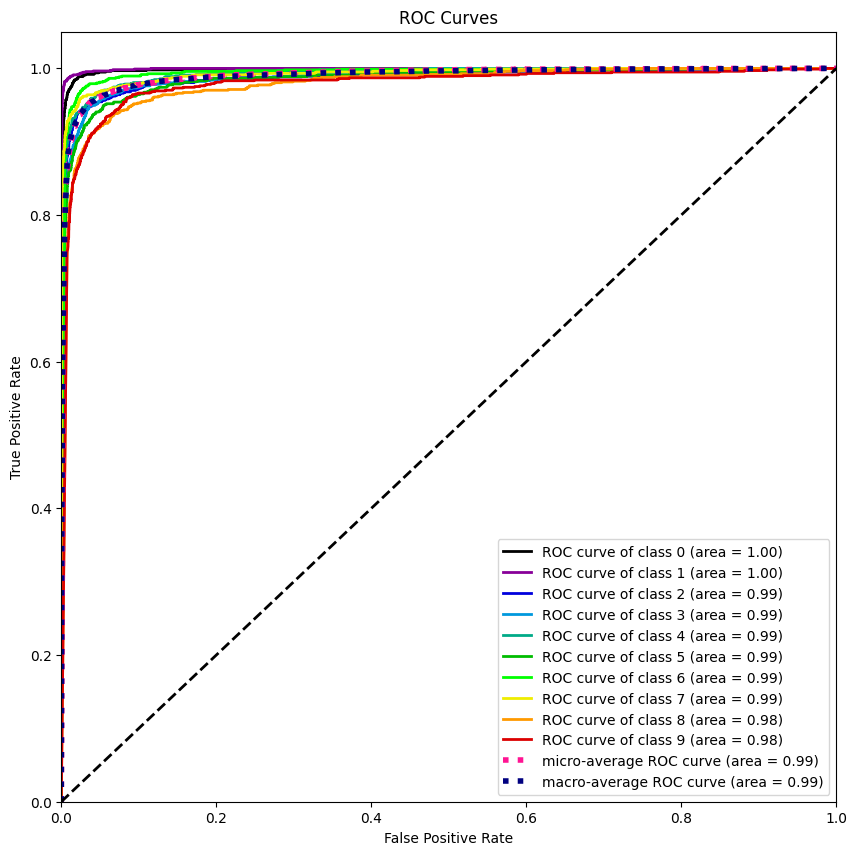

In [25]:
# View ROC Curve
plot_roc(
    y_test, 
    test_probabilities, 
    figsize=(10, 10), 
    title_fontsize='large');

### Inspect Confusion Matrix

In [26]:
def plot_confusion_matrix(y_true, y_pred, classes='auto', figsize=(10, 10), text_size=10): 
    # Generate confusion matrix 
    cm = confusion_matrix(y_true, y_pred)
    
    # Set plot size
    plt.figure(figsize=figsize)

    # Create confusion matrix heatmap
    disp = sns.heatmap(
        cm, annot=True, cmap='Greens',
        annot_kws={"size": text_size}, fmt='g',
        linewidths=0.5, linecolor='black', clip_on=False,
        xticklabels=classes, yticklabels=classes)
    
    # Set title and axis labels
    disp.set_title('Confusion Matrix', fontsize=24)
    disp.set_xlabel('Predicted Label', fontsize=20) 
    disp.set_ylabel('True Label', fontsize=20)
    plt.yticks(rotation=0) 

    # Plot confusion matrix
    plt.show()
    
    return

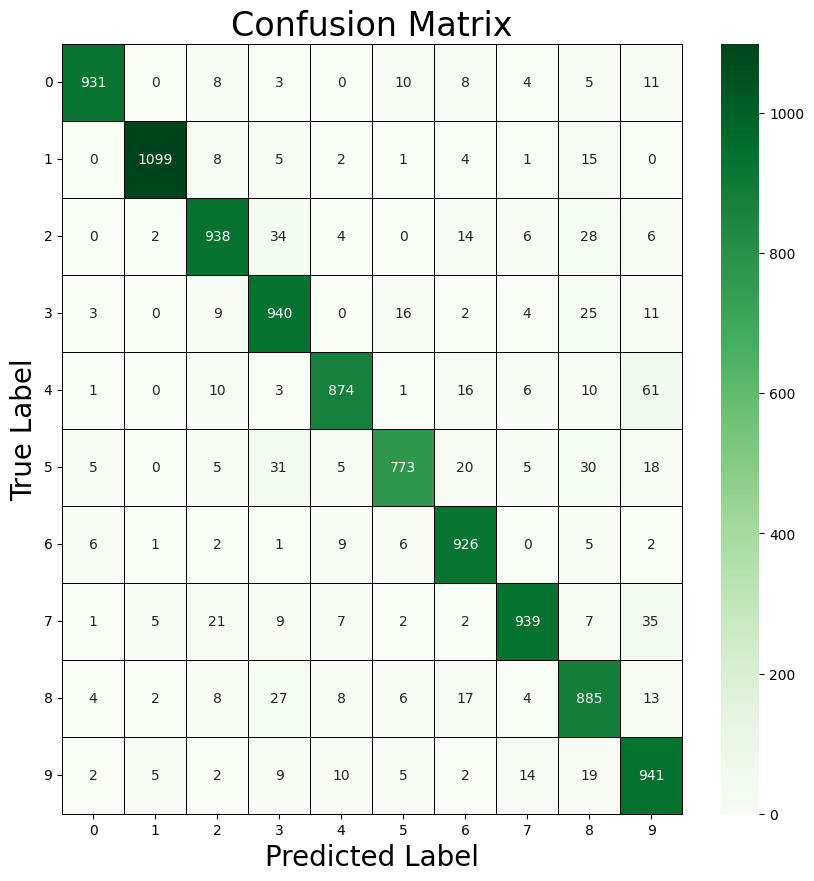

In [27]:
# View confusion matrix
plot_confusion_matrix(y_test, test_predictions, figsize=(10, 10))

### View Classification Report

In [28]:
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       980
           1       0.99      0.97      0.98      1135
           2       0.93      0.91      0.92      1032
           3       0.89      0.93      0.91      1010
           4       0.95      0.89      0.92       982
           5       0.94      0.87      0.90       892
           6       0.92      0.97      0.94       958
           7       0.96      0.91      0.93      1028
           8       0.86      0.91      0.88       974
           9       0.86      0.93      0.89      1009

    accuracy                           0.92     10000
   macro avg       0.93      0.92      0.92     10000
weighted avg       0.93      0.92      0.92     10000



### Inspect Model Metrics

In [29]:
def generate_performance_scores(y_true, y_pred, y_probabilities):
    
    model_accuracy = round(accuracy_score(y_true, y_pred), 5)
    # top_3_accuracy = round(top_k_accuracy_score(y_true, y_probabilities, k=2), 5)
    model_precision, model_recall, model_f1, _ = \
        precision_recall_fscore_support(y_true, y_pred, average="weighted")

    model_precision, model_recall, model_f1 = \
        round(model_precision, 5), round(model_recall, 5), round(model_f1, 5)
    
    model_matthews_corrcoef = round(matthews_corrcoef(y_true, y_pred), 5)
    
    print('=============================================')
    print(f'\nPerformance Metrics:\n')
    print('=============================================')
    print(f'accuracy_score:\t\t{model_accuracy}\n')
    print('_____________________________________________')
    # print(f'top_3_accuracy_score:\t{top_3_accuracy}\n')
    # print('_____________________________________________')
    print(f'precision_score:\t{model_precision}\n')
    print('_____________________________________________')
    print(f'recall_score:\t\t{model_recall}\n')
    print('_____________________________________________')
    print(f'f1_score:\t\t{model_f1}\n')
    print('_____________________________________________')
    print(f'matthews_corrcoef:\t{model_matthews_corrcoef}\n')
    print('=============================================')
    
    return

In [30]:
# View performance scores
generate_performance_scores(y_test, test_predictions, test_probabilities)


Performance Metrics:

accuracy_score:		0.9246

_____________________________________________
precision_score:	0.92652

_____________________________________________
recall_score:		0.9246

_____________________________________________
f1_score:		0.92488

_____________________________________________
matthews_corrcoef:	0.91634



### View Test Sample Predictions

In [31]:
def display_digits(neural_network, X_data, y_data, img_count):
    fig = plt.figure(figsize=(14, 14))

    for i in range(1, img_count + 1):
        idx = random.randint(0, len(X_data) - 1)
        img = np.reshape(X_data[idx], (np.shape(X_data[idx])[0], 1))
        id = y_data[idx]
        
        output = neural_network.forward_propagate(img)
        prediction = np.argmax(output, axis=0)

        prob = output[int(prediction)]
        pixels = img.reshape((28, 28))
        plt.subplot(4, 5, i)
        
        plt.imshow(pixels, cmap='gray')
        plt.title(f'True Label: {id}')
        plt.xlabel(f'NN prediction: {prediction}\nProbability: {round(prob[0], 8)}') 

    plt.subplots_adjust(wspace=0.9, hspace=0.9)
    plt.show()

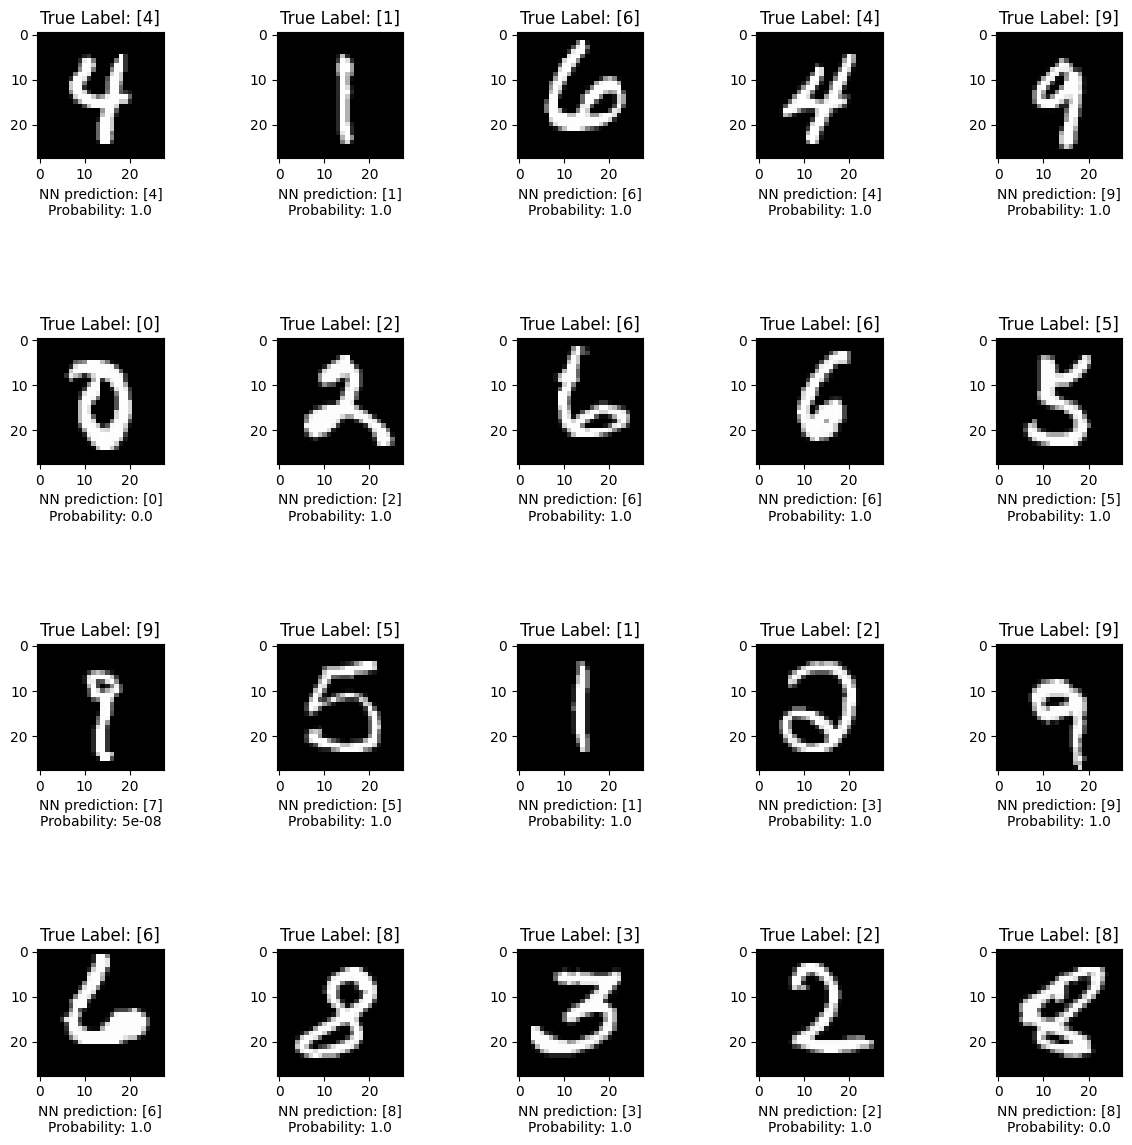

In [32]:
# View random samples and predictions
display_digits(model, X_test, y_test, 20)

# 5. Save Model (Optional)

In [33]:
# [Test] Save model
NetworkConfigHandler.store_network_config(model, 'test')

Preparing Neural Network data for storage...
Saving data...
Neural Network data stored successfully!


In [34]:
# [Test] Load model
test_model = NetworkConfigHandler.load_network_config('test')

Loading Neural Network data...
Re-constructing Neural Network with loaded data...
Neural Network re-constructed and ready for usage!


In [35]:
# Select random test sample
random_idx = random.randint(0, len(test_ds) - 1)
x_t, y_t = test_ds[random_idx]

In [36]:
# [Test] Generate prediction for random sample
pred_y_t = test_model(x_t)

In [37]:
# View prediction for random sample
print(f'y_t:\t\t{np.argmax(y_t)}')
print(f'prediction:\t{np.argmax(pred_y_t)}')
print(f'probabilities:\n{np.squeeze(pred_y_t)}')

y_t:		2
prediction:	2
probabilities:
[3.44045096e-110 3.16583921e-050 1.00000000e+000 6.15883648e-048
 6.74018130e-104 1.38558025e-061 1.75414203e-047 1.49537601e-043
 8.36294718e-041 4.45559737e-043]
